# Description

It projects input data into a UMAP representation.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd

import conf
from utils import generate_result_set_name

# Settings

## Input data

In [3]:
INPUT_FILEPATH_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [4]:
INPUT_FILEPATH = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    "z_score_std",
    f"z_score_std-{INPUT_FILEPATH_STEM}.pkl",
).resolve()
display(INPUT_FILEPATH)

input_filepath_stem = INPUT_FILEPATH.stem
display(input_filepath_stem)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Output folder

In [5]:
# output dir for this notebook
RESULTS_DIR = Path(conf.RESULTS["DATA_TRANSFORMATIONS_DIR"], "umap").resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/data_transformations/umap')

## UMAP options

In [6]:
# parameters of the dimentionality reduction steps
# note that these are the default parameters of UMAP (metric and n_neighbors)
DR_OPTIONS = {
    "n_components": [5, 10, 20, 30, 40, 50],
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [7]:
# dictionary containing all options/settings (used to generate filenames)
ALL_OPTIONS = DR_OPTIONS.copy()

display(ALL_OPTIONS)

{'n_components': [5, 10, 20, 30, 40, 50],
 'metric': 'euclidean',
 'n_neighbors': 15,
 'random_state': 0}

# Load input file

In [8]:
data = pd.read_pickle(INPUT_FILEPATH)

In [9]:
display(data.shape)

(3749, 987)

In [10]:
display(data.head())

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.553743,1.851060,-0.095721,0.931603,-0.515196,1.371264,-0.413165,0.729668,0.546338,0.901153,...,1.148776,1.649018,-1.375952,2.203063,0.810199,-0.987048,0.277710,-0.607613,0.572376,-0.660846
100002_raw-Energy,-1.313905,-0.421015,-0.310524,-0.201978,0.233028,0.693838,0.084129,0.572439,0.217866,1.296973,...,0.165430,0.799276,-0.361989,-0.008253,2.063780,-0.930765,-0.147007,1.601938,-0.273553,-0.560822
100003_raw-Protein,-0.645622,-0.997845,0.249039,0.256499,0.422357,0.829189,-0.169004,0.511550,0.002389,-0.057200,...,1.016791,1.019488,-2.148844,-0.065130,0.041052,-0.836118,-0.320571,1.325519,-0.341494,-0.495786
100004_raw-Fat,-0.913924,-1.837183,0.012095,-1.301315,0.205794,1.129114,0.019985,0.376660,-0.810272,0.843611,...,0.544266,0.576714,0.281731,-0.218963,1.258957,-1.131924,0.378545,0.842047,-0.622194,-0.160058
100005_raw-Carbohydrate,-0.523004,0.131379,-0.097802,-0.030526,-0.021500,-0.219116,0.668229,0.365700,1.102347,0.845625,...,-0.344740,0.079274,0.253427,0.236474,1.033895,-0.229105,0.364793,1.776714,0.190531,-1.459641


# UMAP

**Reproducibility problem**: there seems to be a bug with UMAP in which it produces different results in different operating systems or machines: https://github.com/lmcinnes/umap/issues/153

In [11]:
from data.dimreduction import get_umap_proj

In [12]:
# Get a UMAP representation for all n_components configurations
for n_comp in DR_OPTIONS["n_components"]:
    print(f"# components: {n_comp}")

    # prepare options of n_comp
    options = ALL_OPTIONS.copy()
    options["n_components"] = n_comp
    options = {k: v for k, v in options.items() if k in DR_OPTIONS}

    # get projection
    dr_data = get_umap_proj(data, options)

    # check data dimensionality
    display(dr_data.shape)
    assert dr_data.shape == (data.shape[0], n_comp)

    display(dr_data.iloc[:, 0:5].describe())

    # save
    output_file = Path(
        RESULTS_DIR,
        generate_result_set_name(
            options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
        ),
    ).resolve()
    display(output_file)

    dr_data.to_pickle(output_file)

    print("\n")

# components: 5


'UMAP object: UMAP(n_components=5, random_state=0)'

(3749, 5)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,-6.748096,4.089881,9.800838,7.552997,16.789614
std,1.495590,0.721632,0.647933,0.709873,1.152055
min,-8.381907,0.466272,4.340342,2.267019,8.939292
25%,-7.439402,3.700930,9.395608,7.097145,16.474352
50%,-6.993222,4.078207,9.820533,7.536199,16.952326
75%,-6.524117,4.512246,10.227751,8.017757,17.382624
max,4.722816,8.913355,11.214621,9.879332,18.796043


PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_5-n_neighbors_15-random_state_0.pkl')



# components: 10


'UMAP object: UMAP(n_components=10, random_state=0)'

(3749, 10)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,10.199301,3.087446,-2.841332,6.281397,-8.254377
std,0.608234,0.816963,0.538590,0.438221,1.270905
min,5.885477,-0.991460,-4.287834,4.235908,-9.553450
25%,9.953707,2.877037,-3.139068,5.986564,-8.769279
50%,10.211235,3.237933,-2.878348,6.261196,-8.488070
75%,10.513891,3.520618,-2.608922,6.579037,-8.196743
max,12.332224,11.235950,3.055732,8.424387,3.963049


PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_10-n_neighbors_15-random_state_0.pkl')



# components: 20


'UMAP object: UMAP(n_components=20, random_state=0)'

(3749, 20)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,13.119378,10.108679,9.821308,10.746408,14.250937
std,0.663764,0.651112,0.331349,0.745632,0.772204
min,7.862350,-2.535438,6.012778,4.318391,6.065245
25%,13.013729,9.933308,9.687461,10.656599,14.154560
50%,13.219986,10.126439,9.809447,10.907989,14.348549
75%,13.397995,10.288142,9.959812,11.105313,14.529746
max,13.953726,11.185648,10.865710,11.701056,15.396572


PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_20-n_neighbors_15-random_state_0.pkl')



# components: 30


'UMAP object: UMAP(n_components=30, random_state=0)'

(3749, 30)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,12.676149,7.040922,6.469446,3.613048,15.520720
std,0.655424,0.610625,0.359268,0.302014,0.762647
min,7.441697,-2.741614,4.912322,2.922253,9.144397
25%,12.578290,6.854808,6.321034,3.420767,15.476548
50%,12.784516,6.982929,6.431878,3.567434,15.667595
75%,12.960608,7.173223,6.568983,3.736340,15.827568
max,13.528731,9.536619,10.275929,5.194134,16.385704


PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_30-n_neighbors_15-random_state_0.pkl')



# components: 40


'UMAP object: UMAP(n_components=40, random_state=0)'

(3749, 40)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,11.350368,8.792263,9.561742,5.878908,15.364423
std,0.542540,0.445620,0.310867,0.200000,0.810185
min,6.686911,0.146204,5.150273,4.562639,8.663029
25%,11.256969,8.675344,9.457215,5.773811,15.356217
50%,11.402934,8.792470,9.584893,5.904387,15.498924
75%,11.545303,8.937874,9.703268,6.008964,15.649987
max,12.292361,9.717307,10.243899,6.338960,16.262815


PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_40-n_neighbors_15-random_state_0.pkl')



# components: 50


'UMAP object: UMAP(n_components=50, random_state=0)'

(3749, 50)

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,12.676297,11.200081,10.654470,6.643105,12.951634
std,0.606068,0.551380,0.395270,0.241658,0.554749
min,7.550988,-0.219930,4.529610,5.386307,8.829544
25%,12.570765,11.138938,10.577783,6.539877,12.890648
50%,12.720392,11.238808,10.692269,6.678953,13.049314
75%,12.877816,11.324599,10.784398,6.791796,13.177445
max,14.177553,11.698778,11.115268,7.205040,13.532241


PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

## Plots

In [15]:
import seaborn as sns

Plot the data from the UMAP version with 5 components.

In [16]:
# prepare options of 5 components
options = ALL_OPTIONS.copy()
options["n_components"] = 5
options = {k: v for k, v in options.items() if k in DR_OPTIONS}

# load
input_file = Path(
    RESULTS_DIR,
    generate_result_set_name(
        options, prefix=f"umap-{input_filepath_stem}-", suffix=".pkl"
    ),
).resolve()

dr_data = pd.read_pickle(input_file)

## Full plot

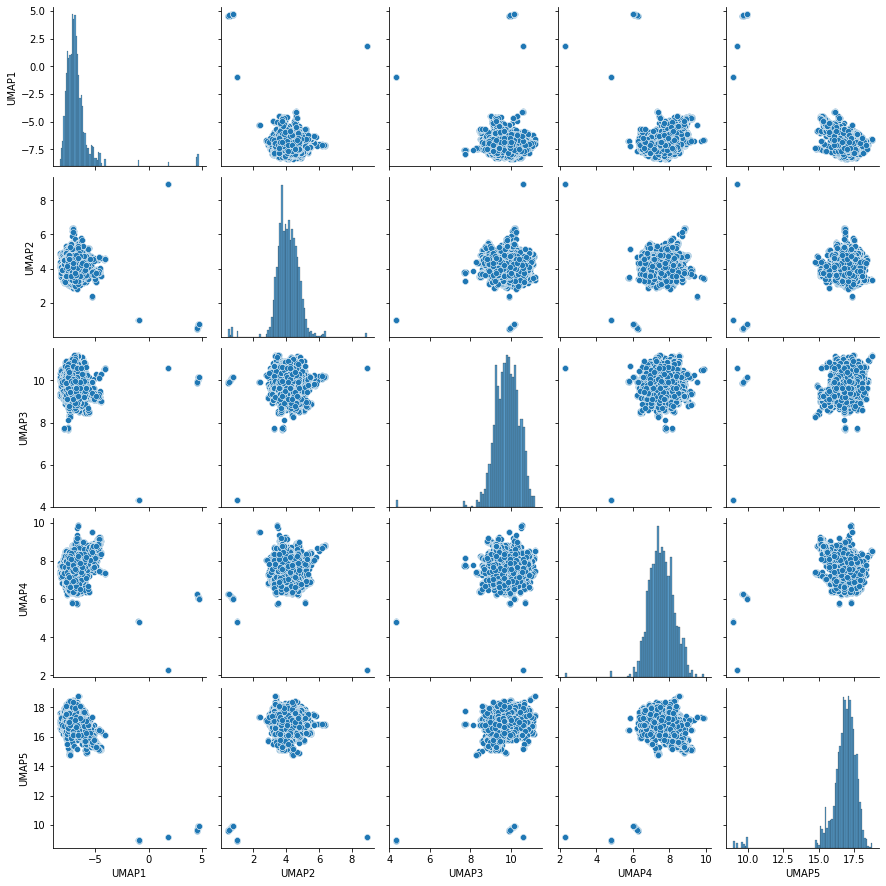

In [18]:
g = sns.pairplot(data=dr_data)

## Plot without "outliers"

In [28]:
# remove "outliers" just to take a look at the big cluster
dr_data_thin = dr_data[
    (dr_data['UMAP1'] < -1)
]

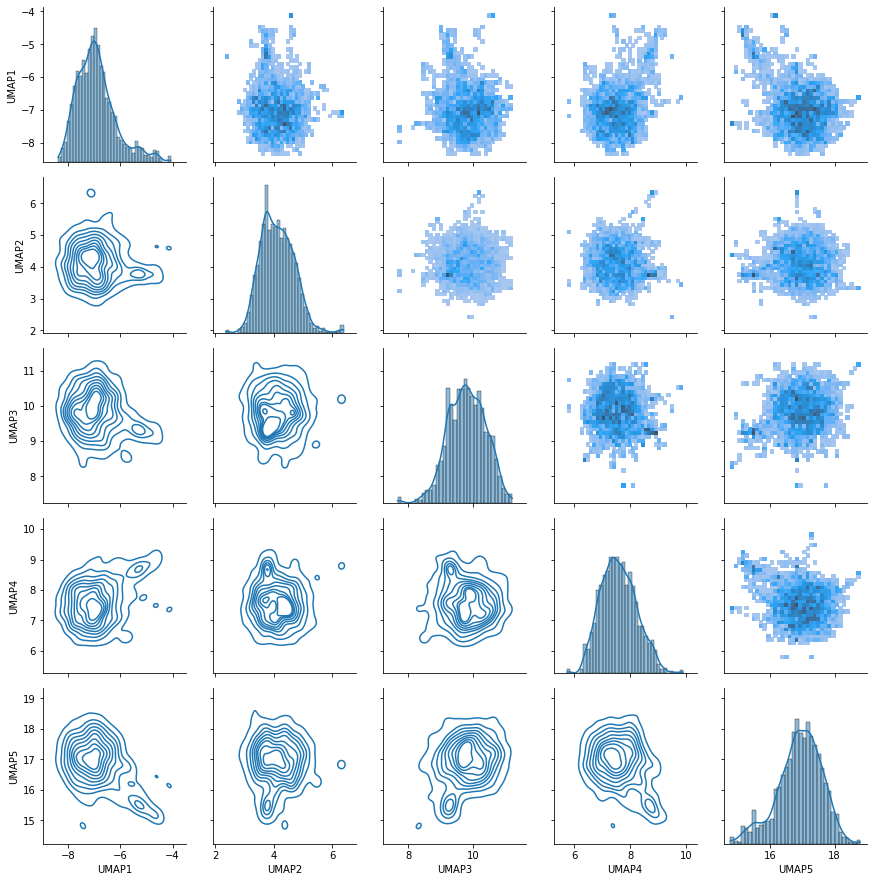

In [29]:
g = sns.PairGrid(data=dr_data_thin)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True)